Crop Yield Prediction - MAE: 30787.259365031645
Crop Price Prediction - RMSE: 93168.8679807777


c:\Users\pujar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\pujar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\pujar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\pujar\AppData\Local\Programs\Python\Python310\lib

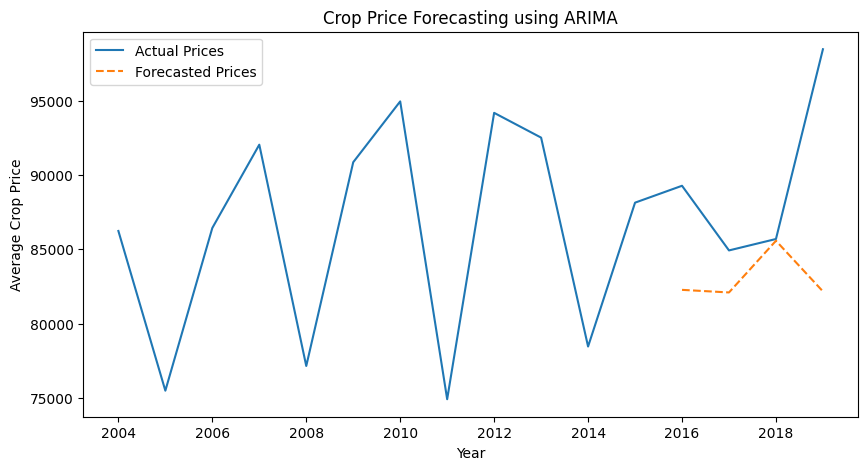

ARIMA Forecasted Prices: 12    82269.136034
13    82093.952455
14    85579.528067
15    82164.290778
Name: predicted_mean, dtype: float64
Optimal Crop Selection - Accuracy: 0.8544303797468354
Irrigation Recommendation - Accuracy: 0.9113924050632911
Seasonal Impact Analysis:
              yeilds         price
season                            
0       20184.694926  86171.280066
1       24916.966969  86684.499426
2       21995.528826  85456.532756
Soil Type Impact Analysis:
soil_type
0     24181.168845
1     19359.364697
2     21629.660232
3     14881.800000
4     40383.923810
5     10979.882653
6      8631.247059
7     41245.469100
8     13524.750000
9      9655.500000
10    12621.233333
11    18641.722100
12     2274.275862
13    20013.166940
14    17715.523810
15    16819.650000
16    37665.494118
17    24452.671875
18    14609.760000
19    76959.833333
20    18161.275132
21    36890.520000
22    32161.558075
23    15705.281991
24    16295.000000
25    60599.564103
26    20851.551724


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_csv("data_season.csv")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Preprocessing
le = LabelEncoder()
for col in ["location", "soil_type", "irrigation", "crops", "season"]:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

def crop_yield_prediction():
    features = ["rainfall", "temperature", "soil_type", "irrigation", "humidity", "area"]
    target = "yeilds"
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Crop Yield Prediction - MAE:", mean_absolute_error(y_test, predictions))

def crop_price_prediction():
    features = ["year", "location", "crops", "yeilds", "season"]
    target = "price"
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Crop Price Prediction - RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

def crop_price_forecasting():
    df_sorted = df.sort_values(by="year")
    price_series = df_sorted.groupby("year")["price"].mean()
    
    train_size = int(len(price_series) * 0.8)
    train, test = price_series[:train_size], price_series[train_size:]
    
    model = ARIMA(train, order=(5,1,0))  # ARIMA(p,d,q) parameters
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    
    plt.figure(figsize=(10,5))
    plt.plot(price_series.index, price_series, label="Actual Prices")
    plt.plot(test.index, forecast, label="Forecasted Prices", linestyle="dashed")
    plt.xlabel("Year")
    plt.ylabel("Average Crop Price")
    plt.title("Crop Price Forecasting using ARIMA")
    plt.legend()
    plt.show()
    
    print("ARIMA Forecasted Prices:", forecast)

def optimal_crop_selection():
    features = ["rainfall", "temperature", "soil_type", "humidity", "season", "irrigation", "location"]
    target = "crops"
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    
    smote = SMOTE()
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    model = XGBClassifier(n_estimators=200, learning_rate=0.1)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Optimal Crop Selection - Accuracy:", accuracy_score(y_test, predictions))

def irrigation_recommendation():
    features = ["crops", "soil_type", "rainfall", "temperature"]
    target = "irrigation"
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Irrigation Recommendation - Accuracy:", accuracy_score(y_test, predictions))

def seasonal_impact_analysis():
    grouped = df.groupby("season")[["yeilds", "price"]].mean()
    print("Seasonal Impact Analysis:")
    print(grouped)

def soil_type_impact_analysis():
    grouped = df.groupby("soil_type")["yeilds"].mean()
    print("Soil Type Impact Analysis:")
    print(grouped)

def climate_impact_analysis():
    features = ["rainfall", "temperature", "crops"]
    target = "yeilds"
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Climate Impact Analysis - MAE:", mean_absolute_error(y_test, predictions))

def main():
    crop_yield_prediction()
    crop_price_prediction()
    crop_price_forecasting()
    optimal_crop_selection()
    irrigation_recommendation()
    seasonal_impact_analysis()
    soil_type_impact_analysis()
    climate_impact_analysis()

if __name__ == "__main__":
    main()


Epoch 1/100


c:\Users\pujar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3761
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3554
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3601
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3497
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3074
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3122
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3089 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2774
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2670
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2744
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2638
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2716
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2416
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2269
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1973
Epoch 16/100
2/2 ━━━━━━━━━━━━━━

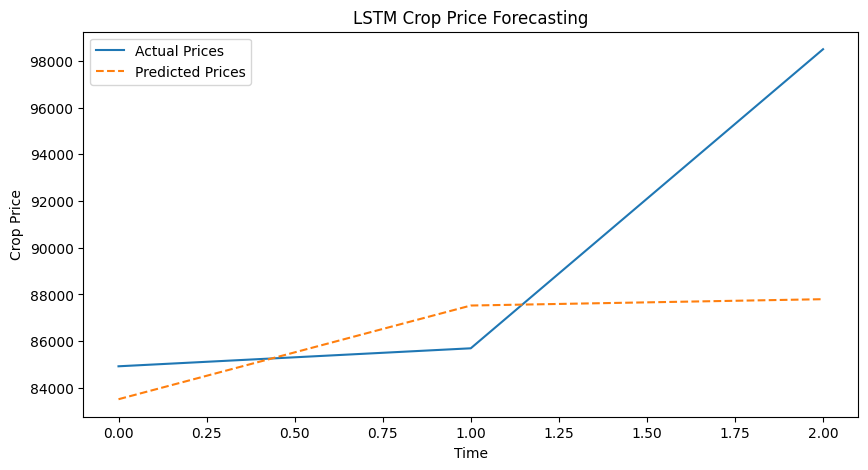

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

def crop_price_forecasting_lstm():
    df_sorted = df.sort_values(by="year")
    price_series = df_sorted.groupby("year")["price"].mean().values.reshape(-1, 1)
    
    # Normalize the data (LSTM performs better with scaled data)
    scaler = MinMaxScaler(feature_range=(0, 1))
    price_scaled = scaler.fit_transform(price_series)
    
    # Prepare data for LSTM
    time_steps = 3  # Number of previous years to use for predicting the next year
    X, y = [], []
    for i in range(len(price_scaled) - time_steps):
        X.append(price_scaled[i:i + time_steps])
        y.append(price_scaled[i + time_steps])

    X, y = np.array(X), np.array(y)

    # Split into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Define LSTM model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer="adam", loss="mean_squared_error")

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)

    # Make predictions
    predictions = model.predict(X_test)
    
    # Convert predictions back to original scale
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    # Plot actual vs predicted prices
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(y_test)), y_test, label="Actual Prices")
    plt.plot(range(len(predictions)), predictions, label="Predicted Prices", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel("Crop Price")
    plt.title("LSTM Crop Price Forecasting")
    plt.legend()
    plt.show()

# Call the function to test it
crop_price_forecasting_lstm()


Epoch 1/200


c:\Users\pujar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.3917 - learning_rate: 0.0010
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3837 - learning_rate: 0.0010
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3778 - learning_rate: 0.0010
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3719 - learning_rate: 0.0010
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3609 - learning_rate: 0.0010
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3581 - learning_rate: 0.0010
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3439 - learning_rate: 0.0010
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3422 - learning_rate: 0.0010
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3287 - learning_rate: 0.0010
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3140 - learning_rate: 0.0010
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3055 - learning_rate: 0.0010
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━

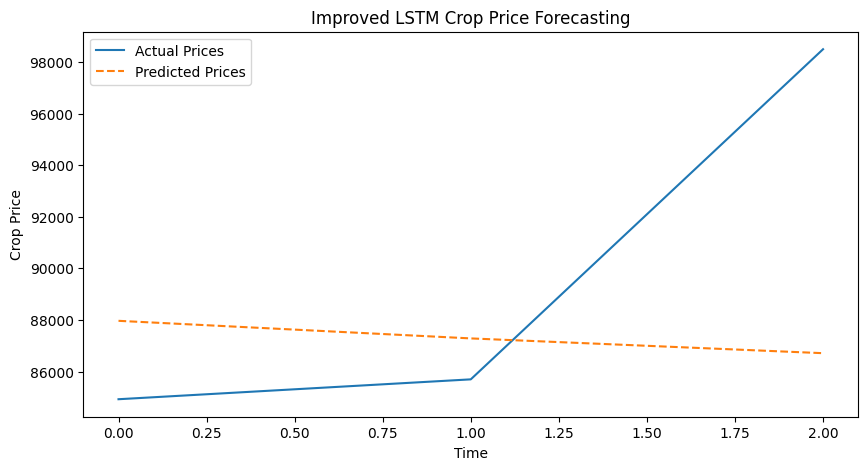

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler

def crop_price_forecasting_lstm_improved():
    df_sorted = df.sort_values(by="year")
    price_series = df_sorted.groupby("year")["price"].mean().values.reshape(-1, 1)
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    price_scaled = scaler.fit_transform(price_series)
    
    # Prepare LSTM input
    time_steps = 5  # Using last 5 years to predict next year
    X, y = [], []
    for i in range(len(price_scaled) - time_steps):
        X.append(price_scaled[i:i + time_steps])
        y.append(price_scaled[i + time_steps])

    X, y = np.array(X), np.array(y)

    # Split into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Define enhanced LSTM model
    model = Sequential([
        Bidirectional(LSTM(100, return_sequences=True, activation='relu'), input_shape=(time_steps, 1)),
        Dropout(0.2),  # Drop 20% of neurons to prevent overfitting
        LSTM(100, return_sequences=True, activation='relu'),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Output layer
    ])

    # Compile the model
    model.compile(optimizer="adam", loss="mean_squared_error")

    # Reduce learning rate if no improvement in loss
    lr_reduction = ReduceLROnPlateau(monitor="loss", patience=5, factor=0.5, min_lr=0.0001)

    # Train the model
    model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=1, callbacks=[lr_reduction])

    # Make predictions
    predictions = model.predict(X_test)
    
    # Convert predictions back to original scale
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    # Plot actual vs predicted prices
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(y_test)), y_test, label="Actual Prices")
    plt.plot(range(len(predictions)), predictions, label="Predicted Prices", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel("Crop Price")
    plt.title("Improved LSTM Crop Price Forecasting")
    plt.legend()
    plt.show()

# Call the function to test the improved model
crop_price_forecasting_lstm_improved()


In [19]:
df.columns

Index(['Year', 'Location', 'Area', 'Rainfall', 'Temperature', 'Soil type',
       'Irrigation', 'yeilds', 'Humidity', 'Crops', 'price', 'Season'],
      dtype='object')

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("data_season.csv")  # Make sure this file exists

# Preprocess the price data
df_sorted = df.sort_values(by="Year")
price_series = df_sorted.groupby("Year")["price"].mean().values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
price_scaled = scaler.fit_transform(price_series)

# Prepare data for LSTM
time_steps = 5
X, y = [], []
for i in range(len(price_scaled) - time_steps):
    X.append(price_scaled[i:i+time_steps])
    y.append(price_scaled[i+time_steps])

X, y = np.array(X), np.array(y)

# Define LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile Model
model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X, y, epochs=50, batch_size=8)

# Save the trained model
model.save("lstm_model.h5")

print("✅ Model trained and saved successfully!")


Epoch 1/50


c:\Users\pujar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3549
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3860
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3484
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3340
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3365
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3249
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3147
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2728
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2467
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2473
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2219
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1862
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1843
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1368
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1174
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/

✅ Model trained and saved successfully!


In [22]:
model.save("lstm_model.h5")  # Saves the trained model

In [27]:
from tensorflow.keras.models import load_model
import tensorflow.keras.losses

# Explicitly define the loss function
custom_objects = {"mse": tensorflow.keras.losses.MeanSquaredError()}

# Load the model with custom_objects
model = load_model("lstm_model.h5", custom_objects=custom_objects)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [28]:
from tensorflow.keras.models import load_model
import tensorflow.keras.losses

# Define custom loss function
custom_objects = {"mse": tensorflow.keras.losses.MeanSquaredError()}

# Load the model
model = load_model("lstm_model.h5", custom_objects=custom_objects)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset (make sure it's the same dataset used for training)
df = pd.read_csv("data_season.csv")
df_sorted = df.sort_values(by="Year")  # Sort by year

# Extract and scale the price data
price_series = df_sorted.groupby("Year")["price"].mean().values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
price_scaled = scaler.fit_transform(price_series)

# Prepare input sequence (same time_steps used in training)
time_steps = 5
X_input = price_scaled[-time_steps:]  # Take the last 'time_steps' entries
X_input = np.array(X_input).reshape(1, time_steps, 1)  # Reshape for LSTM

print("✅ Input data is ready for prediction!")


✅ Input data is ready for prediction!


In [38]:
predicted_price_scaled = model.predict(X_input)
predicted_price = scaler.inverse_transform(predicted_price_scaled)  # Convert back to original scale

print(f"📈 Predicted Crop Price for Next Year: {predicted_price[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
📈 Predicted Crop Price for Next Year: 88143.5390625


In [41]:
X_input

array([[[0.56162196],
        [0.60986413],
        [0.42513919],
        [0.45777263],
        [1.        ]]])

In [42]:
price_series

array([[86239.97592998],
       [75471.29545455],
       [86441.32539683],
       [92057.78571429],
       [77136.5952381 ],
       [90875.26984127],
       [94976.61111111],
       [74894.78030303],
       [94203.88194444],
       [92534.52688172],
       [78448.41935484],
       [88148.90104167],
       [89287.40277778],
       [84927.94594595],
       [85698.08602151],
       [98494.5       ]])